In [17]:
#LIBRARIES
%matplotlib inline

import numpy as np #Scientific Computing packages
import pandas as pd #DataFrame
import os #for data files load
import matplotlib.pyplot as plt #to plot beautiful graphs 
import seaborn as sns #visualization tool
import cufflinks as cf 
import plotly.plotly as py 
import plotly.graph_objs as go
import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


## World Happiness Report  

Pasaulio laimės ataskaita yra orientacinis pasaulinės laimės būklės tyrimas.Šitame Notebooke ištirsiu pačias naujausias ataskaitas - 2017, 2018, 2019 metų (Pastarieji du įkelti tik 2019 metų lapkričio pabaigoje). Ataskaita ir toliau sulaukia pasaulinio pripažinimo, nes vyriausybės, organizacijos ir pilietinė visuomenė vis dažniau naudojasi laimės rodikliais informuodamos apie savo politinius sprendimus. Ekonomika, psichologija, apklausų analizė, nacionalinė statistika, sveikata, viešoji politika ir kita - apibūdina, kaip gerovės matavimai gali būti efektyviai naudojami vertinant tautų pažangą. Ataskaitose apžvelgiama laimės būklė šiandieniniame pasaulyje ir parodoma, kaip naujasis laimės mokslas paaiškina asmeninius ir nacionalinius laimės variantus.Laimės rodyklis yra 10-balėje skalėje. 
<img src="https://frontiermarketnews.files.wordpress.com/2017/03/coverhappy.jpg" width="550" height="100">

## 1. Preparing and Describing the Data

In [2]:
#Load and prepare data files
happiness_2017 = pd.read_csv("C:\\Users\\eveli\\Desktop\\MLproject\\2017.csv")
happiness_2017.columns = ['Happiness_Rank','Country','Happiness_Score', 'Whisker.high', 'Whisker.low',
       'Economy_GDP_per_capita','Family','Health', 'Freedom', 'Trust','Generosity', 'Dystopia.Residual']
columns_2017 = ['Whisker.high', 'Whisker.low', 'Dystopia.Residual']
new_happiness_2017 = happiness_2017.drop(columns_2017, axis=1)

happiness_2018 =  pd.read_csv("C:\\Users\\eveli\\Desktop\\MLproject\\2018.csv")
happiness_2018.columns = ['Happiness_Rank','Country','Happiness_Score','Economy_GDP_per_capita','Family',
                          'Health', 'Freedom', 'Trust','Generosity']
happiness_2019 =  pd.read_csv("C:\\Users\\eveli\\Desktop\\MLproject\\2019.csv")
happiness_2019.columns =['Happiness_Rank','Country','Happiness_Score','Economy_GDP_per_capita','Family',
                          'Health', 'Freedom', 'Trust','Generosity']
frames = [happiness_2019, happiness_2018, new_happiness_2017]
happiness = pd.concat(frames)

In [3]:
happiness.info() #information about new datase

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 154
Data columns (total 9 columns):
Happiness_Rank            467 non-null int64
Country                   467 non-null object
Happiness_Score           467 non-null float64
Economy_GDP_per_capita    467 non-null float64
Family                    467 non-null float64
Health                    467 non-null float64
Freedom                   467 non-null float64
Trust                     467 non-null float64
Generosity                466 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 36.5+ KB


In [4]:
happiness_2017.head()

,Happiness_Rank,Country,Happiness_Score,Whisker.high,Whisker.low,Economy_GDP_per_capita,Family,Health,Freedom,Trust,Generosity,Dystopia.Residual
0,1,Norway,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,2,Denmark,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,3,Iceland,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,4,Switzerland,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,5,Finland,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [5]:
happiness_2018.head()

,Happiness_Rank,Country,Happiness_Score,Economy_GDP_per_capita,Family,Health,Freedom,Trust,Generosity
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [6]:
happiness_2019.head()

,Happiness_Rank,Country,Happiness_Score,Economy_GDP_per_capita,Family,Health,Freedom,Trust,Generosity
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [7]:
happiness.head(10) #top 10 of the happiest countries 2017-2019

,Happiness_Rank,Country,Happiness_Score,Economy_GDP_per_capita,Family,Health,Freedom,Trust,Generosity
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [8]:
happiness.tail(10) #top 10 of the saddest countries 2017-2019

,Happiness_Rank,Country,Happiness_Score,Economy_GDP_per_capita,Family,Health,Freedom,Trust,Generosity
145,146,Yemen,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767
146,147,South Sudan,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794
147,148,Liberia,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948
148,149,Guinea,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938
149,150,Togo,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665
150,151,Rwanda,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220
151,152,Syria,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347
152,153,Tanzania,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035
153,154,Burundi,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148
154,155,Central African Republic,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565


In [9]:
happiness.describe() #main statistic information 

,Happiness_Rank,Happiness_Score,Economy_GDP_per_capita,Family,Health,Freedom,Trust,Generosity
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,466.000000
mean,78.334047,5.379064,0.926981,1.203681,0.624800,0.418642,0.204154,0.115231
std,44.985594,1.119092,0.405078,0.295919,0.252756,0.154046,0.114708,0.097554
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.500000,4.511500,0.628203,1.051500,0.454714,0.313000,0.120000,0.052000
50%,78.000000,5.339000,0.986000,1.258190,0.657000,0.443323,0.190134,0.086362
75%,117.000000,6.170500,1.245000,1.440726,0.817500,0.535500,0.262500,0.143750
max,156.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.464308


## 2. Data visualization 

In [10]:
data2 = dict(type = 'choropleth', 
           locations = happiness['Country'],
           locationmode = 'country names',
           z = happiness['Happiness_Score'], 
           text = happiness['Country'],
           colorscale = 'Viridis',
           colorbar = {'title':'Happiness Score'})
layout = dict(title = 'Happiness Score Across the World',   geo = dict(showframe = False))
choromap3 = go.Figure(data = [data2], layout=layout)
iplot(choromap3)

In [11]:
data6 = dict(type = 'choropleth', 
           locations = happiness['Country'],
           locationmode = 'country names',
           z = happiness['Happiness_Rank'], 
           text = happiness['Country'],
          colorscale = 'RdBu', reversescale = False,
          colorbar = {'title':'Happiness Rank'})
layout = dict(title = 'Happiness Rank Across the World', 
             geo = dict(showframe = False))
choromap6 = go.Figure(data = [data6], layout=layout)
iplot(choromap6)

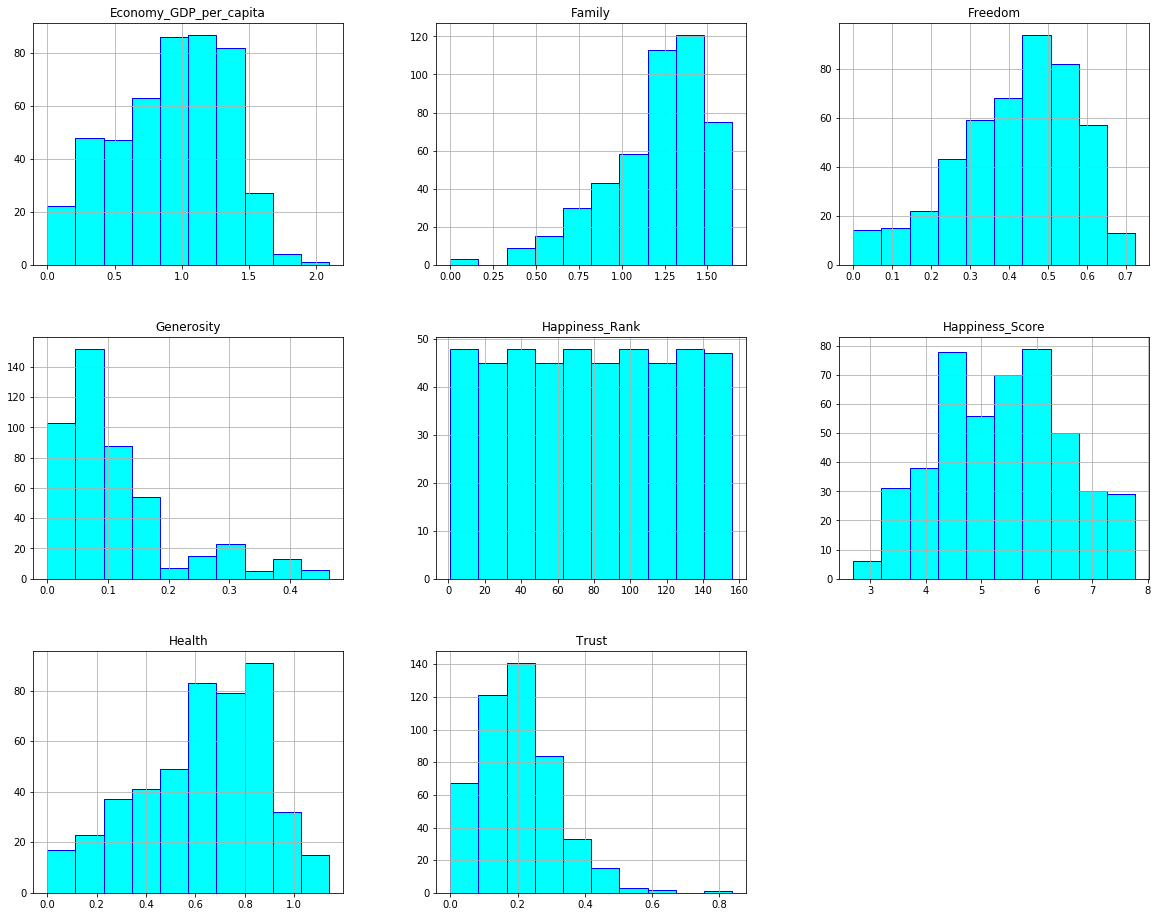

In [12]:
happiness.hist(edgecolor = 'blue', linewidth = 1, figsize = (20,16), color='aqua') 
plt.show()

## 3.Correlations between attributes

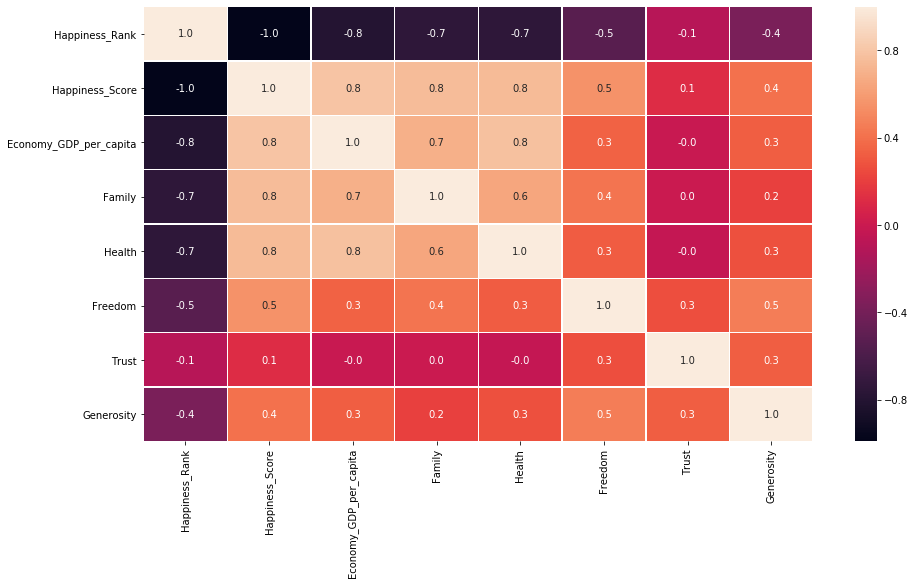

In [13]:
#Correlation Map
f,ax = plt.subplots(figsize=(15, 8))
sns.heatmap(happiness.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Iš aukščiau gautos lentelės matome, kad didžiausia įtaka, iš nagrinėjamų duomenų, <u>Laimės Rodykliui</u> turi Ekonomika (GDP per capita), Sveikata bei Šeima (socialinė padėtis), o mažiausią - Pasitikėjimas Valdžia. 
<br><br>Žemiau pateiksiu grafiškai kelias koreliacijas.  

In [14]:
trace4 = go.Scatter(
    x = happiness.Happiness_Score,
    y = happiness.Economy_GDP_per_capita,
    mode = 'markers'
)
data4 = [trace4]
layout = go.Layout(
    title='Economy GDP per capita Determined by Score',
    xaxis=dict(
        title='Happiness Score',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )
    ),
    yaxis=dict(
        title='Economy GDP per capita',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )
    )
)

fig4 = go.Figure(data=data4, layout=layout)
iplot(fig4)

In [15]:
trace4 = go.Scatter(
    x = happiness.Happiness_Score,
    y = happiness.Trust,
    mode = 'markers'
)
data4 = [trace4]
layout = go.Layout(
    title='Trust Determined by Score',
    xaxis=dict(
        title='Happiness Score',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )
    ),
    yaxis=dict(
        title='Trust',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )
    )
)

fig4 = go.Figure(data=data4, layout=layout)
iplot(fig4)

Pirmas grafikas rodo koreliaciją (tarpusavio priklausomumą) tarp Ekonomikos ir Laimės Rodyklio. Taip pat atrodytų ir koreliacijos grafika Laimės Rodyklio su "Health" arba su "Family". <br><br>Antras grafikas, palyginimui, rodo Laimės rodyklio priklausomumą nuo Pasitikėjimo valdžia "Trust" - matome, kad silpnai priklauso. 

## 4. Transformations 

In [21]:
train, test = train_test_split(happiness, test_size=0.2)
print("Training size: {}; Test size: {}".format(len(train), len(test)))

Training size: 373; Test size: 94


## 5. Data cleaning 